In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('varitey_commodity_total.csv')
df

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
0,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,03/01/2006,600.0,1300.0,1100.0,81
1,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,05/01/2006,1100.0,1400.0,1300.0,81
2,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,16/01/2006,1500.0,1800.0,1800.0,81
3,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,19/01/2006,700.0,900.0,800.0,81
4,Gujarat,Ahmedabad,Ahmedabad,Bitter gourd,Other,FAQ,24/01/2006,500.0,1400.0,1000.0,81
...,...,...,...,...,...,...,...,...,...,...,...
320318,Gujarat,Ahmedabad,Viramgam,Castor Seed,Castor seed,FAQ,18/10/2024,6525.0,6620.0,6570.0,123
320319,Gujarat,Ahmedabad,Viramgam,Castor Seed,Castor seed,FAQ,19/10/2024,6425.0,6580.0,6500.0,123
320320,Gujarat,Ahmedabad,Viramgam,Cummin Seed(Jeera),Other,FAQ,07/11/2024,21450.0,22200.0,21825.0,42
320321,Gujarat,Ahmedabad,Viramgam,Cummin Seed(Jeera),Other,FAQ,19/10/2024,21850.0,22850.0,22350.0,42


In [3]:
df.isnull().sum()

State             0
District          0
Market            0
Commodity         0
Variety           0
Grade             0
Arrival_Date      0
Min_Price         0
Max_Price         0
Modal_Price       0
Commodity_Code    0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(35)

In [37]:
df.drop_duplicates(inplace=True)

df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d/%m/%Y')

df['Arrival_Day'] = df['Arrival_Date'].dt.day
df['Arrival_Month'] = df['Arrival_Date'].dt.month
df['Arrival_Year'] = df['Arrival_Date'].dt.year

df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code,Arrival_Day,Arrival_Month,Arrival_Year
0,0,0,0,15,49,0,2006-01-03,600.0,1300.0,1100.0,81,3,1,2006
1,0,0,0,15,49,0,2006-01-05,1100.0,1400.0,1300.0,81,5,1,2006
2,0,0,0,15,49,0,2006-01-16,1500.0,1800.0,1800.0,81,16,1,2006
3,0,0,0,15,49,0,2006-01-19,700.0,900.0,800.0,81,19,1,2006
4,0,0,0,15,49,0,2006-01-24,500.0,1400.0,1000.0,81,24,1,2006


In [7]:
df.dtypes

State                     object
District                  object
Market                    object
Commodity                 object
Variety                   object
Grade                     object
Arrival_Date      datetime64[ns]
Min_Price                float64
Max_Price                float64
Modal_Price              float64
Commodity_Code             int64
Arrival_Day                int32
Arrival_Month              int32
Arrival_Year               int32
dtype: object

In [ ]:
le = LabelEncoder()

catcols = df.select_dtypes(include='object')

for i in catcols:
    df[i] = le.fit_transform(df[i])
    
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code,Arrival_Day,Arrival_Month,Arrival_Year
0,0,0,0,15,49,0,2006-01-03,600.0,1300.0,1100.0,81,3,1,2006
1,0,0,0,15,49,0,2006-01-05,1100.0,1400.0,1300.0,81,5,1,2006
2,0,0,0,15,49,0,2006-01-16,1500.0,1800.0,1800.0,81,16,1,2006
3,0,0,0,15,49,0,2006-01-19,700.0,900.0,800.0,81,19,1,2006
4,0,0,0,15,49,0,2006-01-24,500.0,1400.0,1000.0,81,24,1,2006


In [9]:
corr = df.corr()

corr['Modal_Price']

State                  NaN
District               NaN
Market            0.165548
Commodity        -0.076141
Variety           0.029529
Grade             0.273295
Arrival_Date      0.288364
Min_Price         0.970414
Max_Price         0.989851
Modal_Price       1.000000
Commodity_Code   -0.032064
Arrival_Day      -0.002992
Arrival_Month     0.013533
Arrival_Year      0.287218
Name: Modal_Price, dtype: float64

In [10]:
variance = df.drop(columns='Arrival_Date', axis = 1).var()
variance

State             0.000000e+00
District          0.000000e+00
Market            1.510645e+01
Commodity         1.084083e+03
Variety           4.988489e+01
Grade             9.769507e-01
Min_Price         4.977803e+06
Max_Price         8.184484e+06
Modal_Price       6.586802e+06
Commodity_Code    1.183415e+04
Arrival_Day       7.659720e+01
Arrival_Month     1.228270e+01
Arrival_Year      2.911693e+01
dtype: float64

<Axes: >

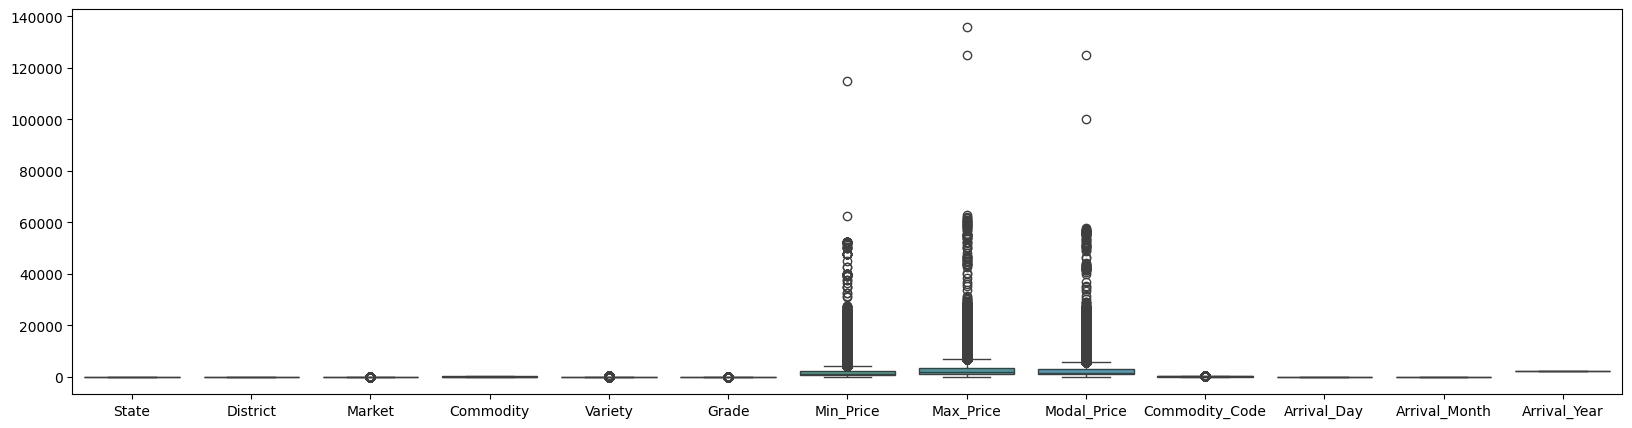

In [42]:
plt.figure(figsize=(20, 5))
sns.boxplot(df)

<Axes: >

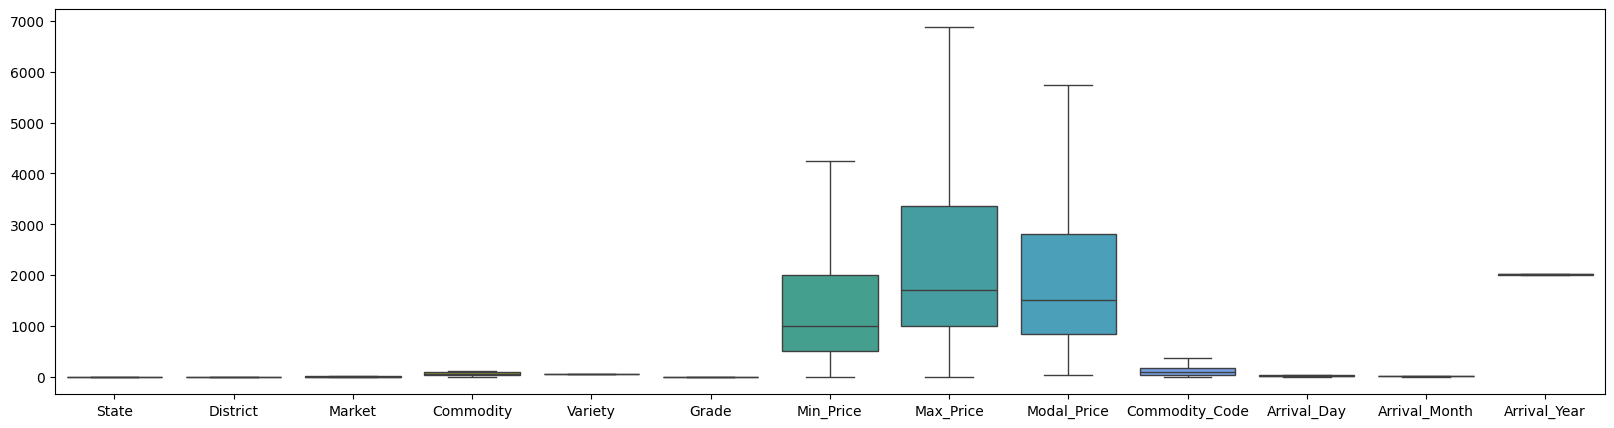

In [40]:
def iqr_clipping(df, columns, multiplier=1.5):
    df_clipped = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_clipped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_clipped

outlier_cols = ['Market', 'Variety', 'Grade', 'Min_Price', 'Max_Price', 'Modal_Price','Commodity_Code']

df_clipped = iqr_clipping(df, outlier_cols, multiplier=1.5)

plt.figure(figsize=(20, 5))
sns.boxplot(df_clipped)

In [43]:
df_edited = df_clipped.drop(columns={'Variety', 'Grade', 'Arrival_Date', 'State', 'District'}, axis=1)
df_edited.head()

,Market,Commodity,Min_Price,Max_Price,Modal_Price,Commodity_Code,Arrival_Day,Arrival_Month,Arrival_Year
0,0,15,600.0,1300.0,1100.0,81,3,1,2006
1,0,15,1100.0,1400.0,1300.0,81,5,1,2006
2,0,15,1500.0,1800.0,1800.0,81,16,1,2006
3,0,15,700.0,900.0,800.0,81,19,1,2006
4,0,15,500.0,1400.0,1000.0,81,24,1,2006


In [45]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_edited)

pca = PCA()
pca_result = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})

print("\nExplained Variance Ratios:")
print(explained_variance_df)


Explained Variance Ratios:
  Principal Component  Explained Variance Ratio
0                 PC1                  0.344525
1                 PC2                  0.146859
2                 PC3                  0.118065
3                 PC4                  0.115055
4                 PC5                  0.109217
5                 PC6                  0.084632
6                 PC7                  0.071872
7                 PC8                  0.009130
8                 PC9                  0.000646


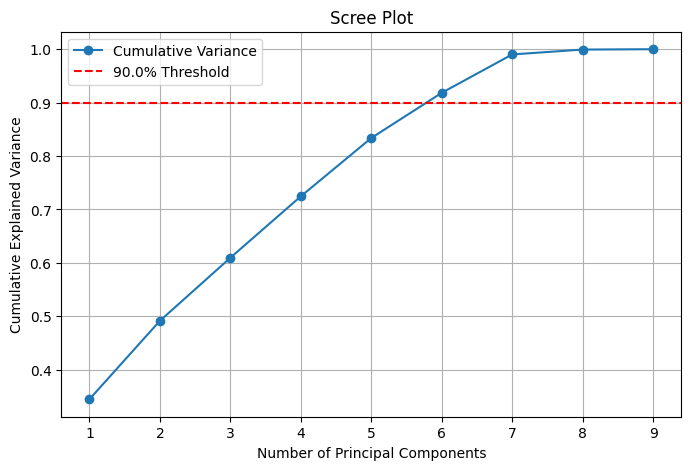

In [46]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
threshold = 0.90
n_components = np.argmax(cumulative_variance >= threshold) + 1

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100}% Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

In [47]:
optimal_pca = PCA(n_components=n_components)
df_pca_transformed = optimal_pca.fit_transform(df_scaled)

print(f"Transformed dataset shape: {df_pca_transformed.shape}")

Transformed dataset shape: (320288, 6)


Prediction Accuracy =  0.9951811013373463
Cross Val Score for 10 Folds =  [0.99506643 0.99537481 0.99541098 0.99514106 0.99537598 0.99513452
 0.9951105  0.99547421 0.99523562 0.99505625]


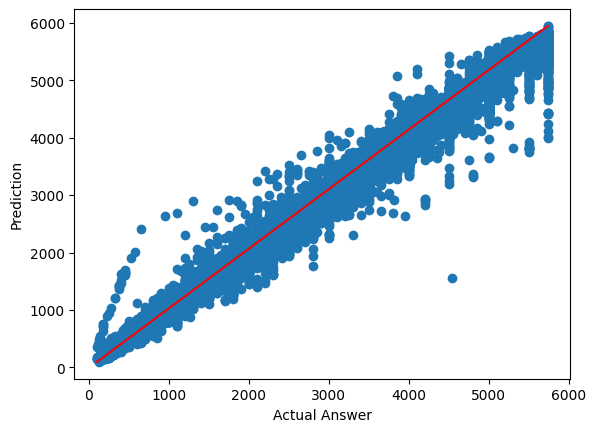

In [52]:
Features = df_pca_transformed
Labels = df_clipped['Modal_Price']

Features_train, Features_test, Labels_train, Labels_test = train_test_split(Features, Labels, test_size=0.2, shuffle=True, random_state=42)

xg = XGBRegressor()
xg.fit(Features_train, Labels_train)
pred = xg.predict(Features_test)
print("Prediction Accuracy = ", xg.score(Features_test,Labels_test))

acc = cross_val_score(xg, Features, Labels, cv=KFold(n_splits=10, shuffle=True, random_state=42))
print("Cross Val Score for 10 Folds = ", acc)

plt.scatter(Labels_test, pred)
plt.xlabel('Actual Answer')
plt.ylabel('Prediction')
plt.plot([min(Labels_test),max(Labels_test)],[min(pred),max(pred)],color='red')